In [891]:
import numpy as np
import pandas as pd
data=pd.read_csv(r'C:\Users\babab\Downloads\Bengaluru_House_Data.csv')
data_copied=data

In [892]:
id(data),id(data_copied)

(2156737377296, 2156737377296)

In [893]:
data_copied=data.copy()
id(data),id(data_copied)

(2156737377296, 2156714818592)

In [894]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [895]:
data.sample(15)

area_type   availability               location       size  \
8866   Super built-up  Area  Ready To Move                 Harlur      3 BHK   
10725          Carpet  Area  Ready To Move               JP Nagar      3 BHK   
9277   Super built-up  Area  Ready To Move         CV Raman Nagar      3 BHK   
1181           Carpet  Area  Ready To Move                Iggalur      2 BHK   
1520   Super built-up  Area  Ready To Move            Kaggalipura      2 BHK   
2377   Super built-up  Area         18-May              Hosa Road      2 BHK   
6233         Built-up  Area  Ready To Move             Anandapura      2 BHK   
10981            Plot  Area  Ready To Move              Hosa Road  5 Bedroom   
6297             Plot  Area  Ready To Move      Jnana Ganga Nagar  3 Bedroom   
12437  Super built-up  Area  Ready To Move      Green Glen Layout      3 BHK   
13090  Super built-up  Area  Ready To Move             Anandapura      3 BHK   
10824  Super built-up  Area  Ready To Move  Raja Rajeshwari Nagar      2 BHK   
13034        Built-up  Area  Ready To Move                 Hennur      2 BHK   
5183         Built-up  Area  Ready To Move                Kengeri      1 BHK   
5642             Plot  Area         18-Feb       Ramamurthy Nagar  2 Bedroom   

       society total_sqft  bath  balcony   price  
8866       NaN       1756   3.0      2.0  134.00  
10725  Saacy A       2400   3.0      3.0  196.00  
9277   Pu270a        1836   3.0      2.0  148.00  
1181   VaoldMa        910   2.0      1.0   30.50  
1520   Baowsig        950   2.0      1.0   39.00  
2377   SStusan       1063   2.0      1.0   31.90  
6233   LoLeoen       1250   2.0      2.0   45.00  
10981      NaN        900   5.0      0.0   55.00  
6297       NaN        600   4.0      1.0   81.00  
12437  SoosePr       1715   3.0      2.0  105.00  
13090  ViensRK       1576   3.0      2.0   58.70  
10824      NaN       1250   2.0      2.0   68.00  
13034      NaN       1050   2.0      2.0   42.73  
5183       NaN        502   1.0      1.0   25.00  
5642       NaN       1200   2.0      1.0   76.00

In [896]:
data.describe()

bath       balcony         price
count  13247.000000  12711.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.341458      0.817263    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000      2.000000    120.000000
max       40.000000      3.000000   3600.000000

In [897]:
data.describe(include='all')

area_type   availability    location   size  society  \
count                  13320          13320       13319  13304     7818   
unique                     4             81        1305     31     2688   
top     Super built-up  Area  Ready To Move  Whitefield  2 BHK  GrrvaGr   
freq                    8790          10581         540   5199       80   
mean                     NaN            NaN         NaN    NaN      NaN   
std                      NaN            NaN         NaN    NaN      NaN   
min                      NaN            NaN         NaN    NaN      NaN   
25%                      NaN            NaN         NaN    NaN      NaN   
50%                      NaN            NaN         NaN    NaN      NaN   
75%                      NaN            NaN         NaN    NaN      NaN   
max                      NaN            NaN         NaN    NaN      NaN   

       total_sqft          bath       balcony         price  
count       13320  13247.000000  12711.000000  13320.000000  
unique       2117           NaN           NaN           NaN  
top          1200           NaN           NaN           NaN  
freq          843           NaN           NaN           NaN  
mean          NaN      2.692610      1.584376    112.565627  
std           NaN      1.341458      0.817263    148.971674  
min           NaN      1.000000      0.000000      8.000000  
25%           NaN      2.000000      1.000000     50.000000  
50%           NaN      2.000000      2.000000     72.000000  
75%           NaN      3.000000      2.000000    120.000000  
max           NaN     40.000000      3.000000   3600.000000

In [898]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


- we need to convert total_sqft to int type in the first place
- we could split the size column as bedroom, kitechen and hall as three seperate columns
- we could also split area type to seperate cols

In [899]:
data.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [900]:
data[~data['total_sqft'].str.isdigit()]['total_sqft'].value_counts()

total_sqft
2830 - 2882    5
1752.12        4
2087.01        3
3630 - 3800    3
1777.26        3
              ..
910.2          1
1974 - 2171    1
2006.8         1
888 - 1290     1
1133 - 1384    1
Name: count, Length: 295, dtype: int64

In [901]:
data[data.duplicated()]

area_type   availability          location       size  \
971    Super built-up  Area  Ready To Move      Haralur Road      3 BHK   
1115   Super built-up  Area  Ready To Move      Haralur Road      2 BHK   
1143   Super built-up  Area  Ready To Move       Vittasandra      2 BHK   
1290   Super built-up  Area  Ready To Move      Haralur Road      2 BHK   
1394   Super built-up  Area  Ready To Move      Haralur Road      2 BHK   
...                     ...            ...               ...        ...   
13285  Super built-up  Area  Ready To Move      VHBCS Layout      2 BHK   
13299  Super built-up  Area         18-Dec        Whitefield      4 BHK   
13311            Plot  Area  Ready To Move  Ramamurthy Nagar  7 Bedroom   
13313  Super built-up  Area  Ready To Move       Uttarahalli      3 BHK   
13319  Super built-up  Area  Ready To Move      Doddathoguru      1 BHK   

       society   total_sqft  bath  balcony  price  
971    NRowse          1464   3.0      2.0   56.0  
1115       NaN         1027   2.0      2.0   44.0  
1143   Prlla C         1246   2.0      1.0   64.5  
1290       NaN         1194   2.0      2.0   47.0  
1394       NaN         1027   2.0      2.0   44.0  
...        ...          ...   ...      ...    ...  
13285  OlarkLa         1353   2.0      2.0  110.0  
13299  Prtates  2830 - 2882   5.0      0.0  154.5  
13311      NaN         1500   9.0      2.0  250.0  
13313  Aklia R         1345   2.0      1.0   57.0  
13319      NaN          550   1.0      1.0   17.0  

[529 rows x 9 columns]

In [902]:
data.drop_duplicates(inplace=True)

In [903]:
def checfloat(n):
    try :
        float(n)
        return 'covertable'
    except :
        return n
k=data['total_sqft'].apply(checfloat)
k.value_counts()

total_sqft
covertable           12545
2830 - 2882              4
3630 - 3800              3
1200 - 2400              3
2249.81 - 4112.19        3
                     ...  
315Sq. Yards             1
1650 - 2538              1
2725 - 3250              1
1974 - 2171              1
1133 - 1384              1
Name: count, Length: 223, dtype: int64

In [904]:
import re
def convert(n):
    n = re.sub(r'[^\d\-]', '', n)
    if '-' in n:
        ele = n.split('-')
        for i in range(2):
            ele[i] = ele[i].strip()
        avg=(float(ele[0])+float(ele[1]))/2
        return avg
    try:
        return float(n)
    except:
        print(n)
        return n

data['total_sqft']=data['total_sqft'].apply(convert)
k=data['total_sqft'].apply(checfloat)
k.value_counts()

total_sqft
covertable    12791
Name: count, dtype: int64

In [905]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12791 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12791 non-null  object 
 1   availability  12791 non-null  object 
 2   location      12790 non-null  object 
 3   size          12775 non-null  object 
 4   society       7463 non-null   object 
 5   total_sqft    12791 non-null  float64
 6   bath          12718 non-null  float64
 7   balcony       12186 non-null  float64
 8   price         12791 non-null  float64
dtypes: float64(4), object(5)
memory usage: 999.3+ KB


In [906]:
data['area_type'].value_counts()

area_type
Super built-up  Area    8317
Built-up  Area          2398
Plot  Area              1989
Carpet  Area              87
Name: count, dtype: int64

In [907]:
data['location'].value_counts()

location
Whitefield                        523
Sarjapur  Road                    379
Electronic City                   287
Kanakpura Road                    249
Thanisandra                       229
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [908]:
data['size'].value_counts()

size
2 BHK         4931
3 BHK         4120
4 Bedroom      824
4 BHK          574
3 Bedroom      535
1 BHK          521
2 Bedroom      314
5 Bedroom      291
6 Bedroom      191
1 Bedroom      104
8 Bedroom       84
7 Bedroom       82
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [909]:
data['size'] = data['size'].fillna(np.nan)

In [910]:
data['size'].isnull().sum()

16

In [911]:
data['rooms']=data['size']

In [912]:
data[~(data['rooms'].str.contains('Bedroom') | data['rooms'].str.contains('BHK'))]['rooms'].value_counts()

rooms
1 RK    13
Name: count, dtype: int64

In [913]:
data['hall']=data['size']
data['kitchen']=data['size']

In [914]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12791 entries, 0 to 13318
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12791 non-null  object 
 1   availability  12791 non-null  object 
 2   location      12790 non-null  object 
 3   size          12775 non-null  object 
 4   society       7463 non-null   object 
 5   total_sqft    12791 non-null  float64
 6   bath          12718 non-null  float64
 7   balcony       12186 non-null  float64
 8   price         12791 non-null  float64
 9   rooms         12775 non-null  object 
 10  hall          12775 non-null  object 
 11  kitchen       12775 non-null  object 
dtypes: float64(4), object(8)
memory usage: 1.3+ MB


for size data we have 
- 'x BHK'
- x Bedroom
- x RK
- NA 

In [915]:
data['size'].sample(5)

5245         3 BHK
10175        1 BHK
13232        3 BHK
11217        3 BHK
788      4 Bedroom
Name: size, dtype: object

In [916]:
import re
import numpy as np

data['rooms'] = data['rooms'].astype(str)  # Ensure string data type
data['rooms'] = data['rooms'].apply(lambda x: re.sub(r'[^0-9]', '', x))

# Convert empty strings to NaN
data['rooms'] = data['rooms'].replace('', np.nan)

In [917]:
data['rooms']=data['rooms'].astype(float)

In [918]:
data['rooms'].value_counts()

rooms
2.0     5245
3.0     4655
4.0     1398
1.0      638
5.0      350
6.0      221
7.0       99
8.0       89
9.0       54
10.0      14
11.0       4
27.0       1
19.0       1
16.0       1
43.0       1
14.0       1
12.0       1
13.0       1
18.0       1
Name: count, dtype: int64

In [919]:
data['hall'] = data['hall'].astype(str).apply(lambda x: 1 if 'H' in x else 0)

In [920]:
data['hall'].value_counts()

hall
1    10274
0     2517
Name: count, dtype: int64

In [921]:
data['kitchen'] = data['kitchen'].astype(str).apply(lambda x: 1 if 'K' in x else 0)

In [922]:
data.loc[data['rooms'] > 1, ['hall', 'kitchen']] = 1

In [923]:
data['hall'].value_counts()

hall
1    12658
0      133
Name: count, dtype: int64

In [924]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12791 entries, 0 to 13318
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12791 non-null  object 
 1   availability  12791 non-null  object 
 2   location      12790 non-null  object 
 3   size          12775 non-null  object 
 4   society       7463 non-null   object 
 5   total_sqft    12791 non-null  float64
 6   bath          12718 non-null  float64
 7   balcony       12186 non-null  float64
 8   price         12791 non-null  float64
 9   rooms         12775 non-null  float64
 10  hall          12791 non-null  int64  
 11  kitchen       12791 non-null  int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 1.3+ MB


In [925]:
data.drop(columns=['size'],inplace=True)

In [926]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12791 entries, 0 to 13318
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12791 non-null  object 
 1   availability  12791 non-null  object 
 2   location      12790 non-null  object 
 3   society       7463 non-null   object 
 4   total_sqft    12791 non-null  float64
 5   bath          12718 non-null  float64
 6   balcony       12186 non-null  float64
 7   price         12791 non-null  float64
 8   rooms         12775 non-null  float64
 9   hall          12791 non-null  int64  
 10  kitchen       12791 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 1.2+ MB


In [927]:
locationx=data['location'].value_counts()
print(locationx)

location
Whitefield                        523
Sarjapur  Road                    379
Electronic City                   287
Kanakpura Road                    249
Thanisandra                       229
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64


In [928]:
filtered_locations = locationx[locationx >= 10]
filtered_locations

location
Whitefield              523
Sarjapur  Road          379
Electronic City         287
Kanakpura Road          249
Thanisandra             229
                       ... 
BEML Layout              10
Nagappa Reddy Layout     10
Vasanthapura             10
Marsur                   10
Naganathapura            10
Name: count, Length: 249, dtype: int64

In [929]:
data['location'] = data['location'].astype(str).apply(lambda x: x if x in filtered_locations else 'others')

In [930]:
data['location'].value_counts()

location
others                  2789
Whitefield               523
Sarjapur  Road           379
Electronic City          287
Kanakpura Road           249
                        ... 
Marsur                    10
BEML Layout               10
Nagappa Reddy Layout      10
BTM 1st Stage             10
Nagadevanahalli           10
Name: count, Length: 250, dtype: int64

location columns missing values, scattered value are done

lets look into availability col now

In [931]:
data['availability'].sample(10)

1238     Ready To Move
1062     Ready To Move
9656            18-Oct
1438     Ready To Move
6514            18-Aug
9167            18-Jun
3274     Ready To Move
3404            22-Dec
13199    Ready To Move
10753    Ready To Move
Name: availability, dtype: object

In [932]:
data['availability'].value_counts()

availability
Ready To Move    10172
18-May             292
18-Dec             284
18-Apr             269
18-Aug             187
                 ...  
16-Oct               1
15-Dec               1
15-Jun               1
16-Jul               1
14-Jul               1
Name: count, Length: 81, dtype: int64

In [933]:
data['availability']=data['availability'].apply(lambda x: re.sub('[0-9/-]','',str(x).strip()))

In [934]:
data['availability'].value_counts()

availability
Ready To Move           10172
Dec                       678
May                       335
Apr                       296
Mar                       242
Aug                       236
Jun                       193
Jul                       192
Jan                       112
Oct                        90
Sep                        78
Nov                        76
Feb                        75
Immediate Possession       16
Name: count, dtype: int64

In [935]:
#data['availability']=data['availability'].astype(str).apply(lambda x: x if x in availx else 'not sure')

<Axes: xlabel='availability', ylabel='price'>

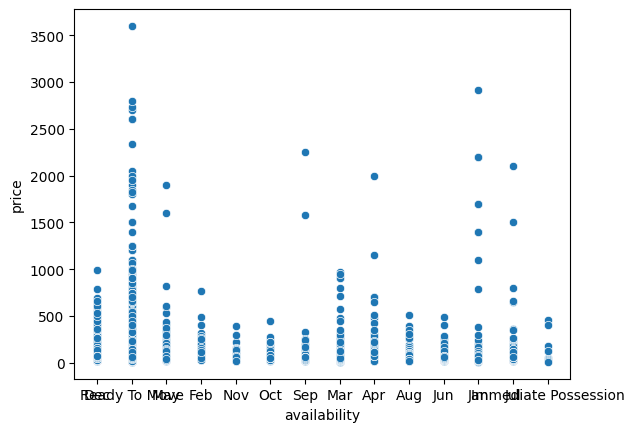

In [936]:
import seaborn as sns
sns.scatterplot(x=data['availability'],y=data['price'])

<Axes: xlabel='area_type', ylabel='price'>

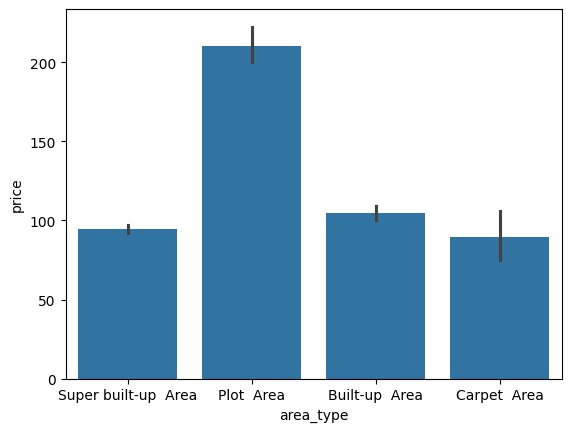

In [937]:
sns.barplot(x=data['area_type'],y=data['price'])

In [938]:
soc=data['society'].value_counts()
soc

society
GrrvaGr    68
PrarePa    63
Sryalan    56
Prtates    54
GMown E    52
           ..
AcisePa     1
Madener     1
Siilka      1
Tepleee     1
RSntsAp     1
Name: count, Length: 2688, dtype: int64

In [939]:
soc[soc>40]

society
GrrvaGr    68
PrarePa    63
Sryalan    56
Prtates    54
GMown E    52
Bhmesy     51
Prarkun    48
IBityin    45
PrityTr    42
Prityel    41
Name: count, dtype: int64

In [940]:
soc[soc>9].index

Index(['GrrvaGr', 'PrarePa', 'Sryalan', 'Prtates', 'GMown E', 'Bhmesy ',
       'Prarkun', 'IBityin', 'PrityTr', 'Prityel',
       ...
       'Sovar S', 'SuVue S', 'SJityaz', 'DNeremo', 'Itvir M', 'SheldGr',
       'Maity W', 'PrityFa', 'ViensRK', 'Shateor'],
      dtype='object', name='society', length=137)

In [941]:
data['society']=data['society'].apply(lambda x: x if x in soc[soc>9].index else 'others' )

In [942]:
data['society'].value_counts()

society
others     10220
GrrvaGr       68
PrarePa       63
Sryalan       56
Prtates       54
           ...  
SheldGr       10
Shateor       10
PrityFa       10
AsNowre       10
SJityaz       10
Name: count, Length: 138, dtype: int64

<Axes: xlabel='society', ylabel='price'>

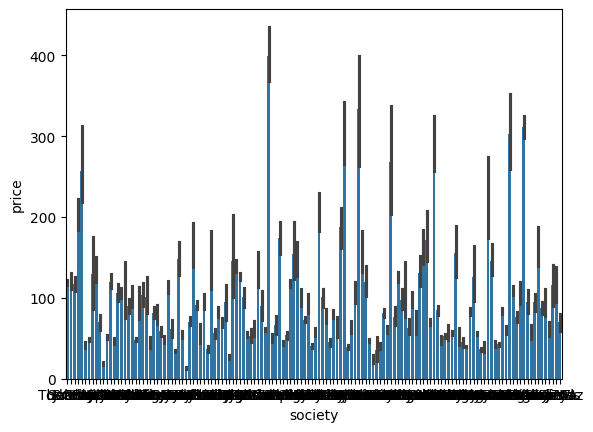

In [943]:
sns.barplot(x=data['society'], y=data['price'])

understanding the society could be an key element in predicting price

In [944]:
data

area_type   availability                  location  society  \
0      Super built-up  Area            Dec  Electronic City Phase II   others   
1                Plot  Area  Ready To Move          Chikka Tirupathi  Theanmp   
2            Built-up  Area  Ready To Move               Uttarahalli   others   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli  Soiewre   
4      Super built-up  Area  Ready To Move                  Kothanur   others   
...                     ...            ...                       ...      ...   
13314  Super built-up  Area  Ready To Move         Green Glen Layout   others   
13315        Built-up  Area  Ready To Move                Whitefield   others   
13316  Super built-up  Area  Ready To Move                    others   others   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   others   
13318  Super built-up  Area            Jun           Padmanabhanagar   others   

       total_sqft  bath  balcony   price  rooms  hall  kitchen  
0          1056.0   2.0      1.0   39.07    2.0     1        1  
1          2600.0   5.0      3.0  120.00    4.0     1        1  
2          1440.0   2.0      3.0   62.00    3.0     1        1  
3          1521.0   3.0      1.0   95.00    3.0     1        1  
4          1200.0   2.0      1.0   51.00    2.0     1        1  
...           ...   ...      ...     ...    ...   ...      ...  
13314      1715.0   3.0      3.0  112.00    3.0     1        1  
13315      3453.0   4.0      0.0  231.00    5.0     1        1  
13316      3600.0   5.0      NaN  400.00    4.0     1        1  
13317      1141.0   2.0      1.0   60.00    2.0     1        1  
13318      4689.0   4.0      1.0  488.00    4.0     1        1  

[12791 rows x 11 columns]

In [945]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12791 entries, 0 to 13318
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12791 non-null  object 
 1   availability  12791 non-null  object 
 2   location      12791 non-null  object 
 3   society       12791 non-null  object 
 4   total_sqft    12791 non-null  float64
 5   bath          12718 non-null  float64
 6   balcony       12186 non-null  float64
 7   price         12791 non-null  float64
 8   rooms         12775 non-null  float64
 9   hall          12791 non-null  int64  
 10  kitchen       12791 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 1.2+ MB


In [946]:
data.describe(include='all')

area_type   availability location society     total_sqft  \
count                  12791          12791    12791   12791   12791.000000   
unique                     4             14      250     138            NaN   
top     Super built-up  Area  Ready To Move   others  others            NaN   
freq                    8317          10172     2789   10220            NaN   
mean                     NaN            NaN      NaN     NaN    2520.729732   
std                      NaN            NaN      NaN     NaN   14090.631084   
min                      NaN            NaN      NaN     NaN       1.000000   
25%                      NaN            NaN      NaN     NaN    1100.000000   
50%                      NaN            NaN      NaN     NaN    1284.000000   
75%                      NaN            NaN      NaN     NaN    1700.000000   
max                      NaN            NaN      NaN     NaN  566584.000000   

                bath       balcony         price         rooms          hall  \
count   12718.000000  12186.000000  12791.000000  12775.000000  12791.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        2.708602      1.582308    114.317646      2.817847      0.989602   
std         1.357764      0.822536    151.480310      1.311841      0.101443   
min         1.000000      0.000000      8.000000      1.000000      0.000000   
25%         2.000000      1.000000     50.000000      2.000000      1.000000   
50%         2.000000      2.000000     73.000000      3.000000      1.000000   
75%         3.000000      2.000000    121.000000      3.000000      1.000000   
max        40.000000      3.000000   3600.000000     43.000000      1.000000   

             kitchen  
count   12791.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.990618  
std         0.096407  
min         0.000000  
25%         1.000000  
50%         1.000000  
75%         1.000000  
max         1.000000

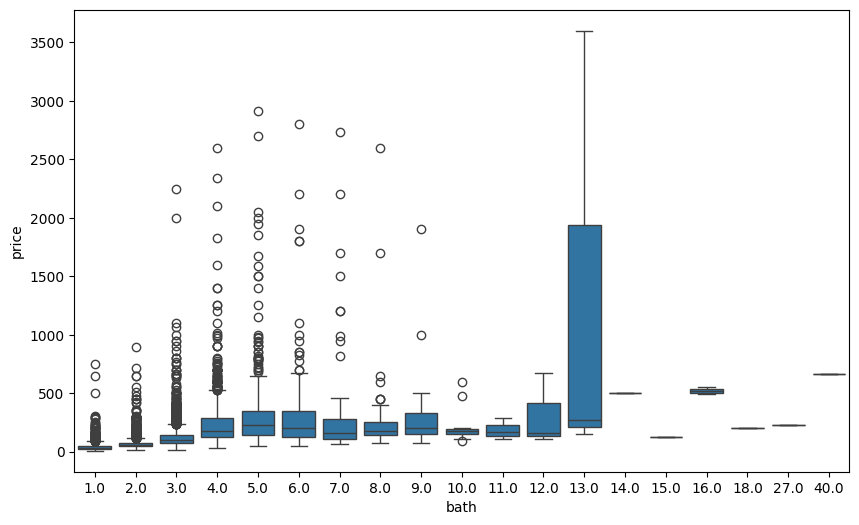

In [947]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axes with desired size
fig, ax = plt.subplots(figsize=(10, 6))

# Create the boxplot using Seaborn with the created axes
sns.boxplot(x='bath', y='price', data=data, ax=ax)
plt.show()

In [948]:
data[data['bath']>10]

area_type   availability              location society  \
938              Plot  Area  Ready To Move    5th Phase JP Nagar  others   
1078             Plot  Area  Ready To Move         BTM 1st Stage  others   
1718   Super built-up  Area  Ready To Move                others  others   
1768             Plot  Area  Ready To Move                others  others   
1953             Plot  Area  Ready To Move              KR Puram  others   
1979             Plot  Area  Ready To Move                others  others   
3096   Super built-up  Area  Ready To Move                others  others   
3379   Super built-up  Area  Ready To Move                others  others   
3609   Super built-up  Area  Ready To Move                others  others   
4684             Plot  Area  Ready To Move           Munnekollal  others   
4916   Super built-up  Area  Ready To Move                others  others   
6937             Plot  Area  Ready To Move  5th Block Hbr Layout  others   
7979   Super built-up  Area  Ready To Move                others  others   
8106             Plot  Area  Ready To Move                others  others   
8636   Super built-up  Area  Ready To Move        Neeladri Nagar  others   
9935   Super built-up  Area  Ready To Move                others  others   
10695            Plot  Area            Feb       Electronic City  others   
11128            Plot  Area  Ready To Move                Jigani  others   
11559            Plot  Area            Apr                others  others   
13067            Plot  Area  Ready To Move                others  others   

       total_sqft  bath  balcony   price  rooms  hall  kitchen  
938        1260.0  11.0      NaN   290.0    9.0     1        1  
1078       3300.0  14.0      NaN   500.0    9.0     1        1  
1718       8000.0  27.0      0.0   230.0   27.0     1        1  
1768       1200.0  11.0      0.0   170.0   11.0     1        1  
1953       1200.0  12.0      NaN   110.0    8.0     1        1  
1979        990.0  12.0      0.0   120.0    8.0     1        1  
3096      12000.0  12.0      NaN   525.0   10.0     1        1  
3379       2000.0  16.0      NaN   490.0   19.0     1        1  
3609      10000.0  16.0      NaN   550.0   16.0     1        1  
4684       2400.0  40.0      0.0   660.0   43.0     1        1  
4916       1250.0  15.0      0.0   125.0   14.0     1        1  
6937       2600.0  12.0      NaN   675.0    9.0     1        1  
7979       6000.0  12.0      NaN   150.0   11.0     1        1  
8106       1850.0  12.0      NaN   300.0    8.0     1        1  
8636       4000.0  12.0      NaN   160.0   10.0     1        1  
9935       5425.0  13.0      0.0   275.0   13.0     1        1  
10695      1200.0  13.0      NaN   150.0    9.0     1        1  
11128      1200.0  11.0      NaN   105.0   10.0     1        1  
11559      1200.0  18.0      NaN   200.0   18.0     1        1  
13067      7150.0  13.0      NaN  3600.0   10.0     1        1

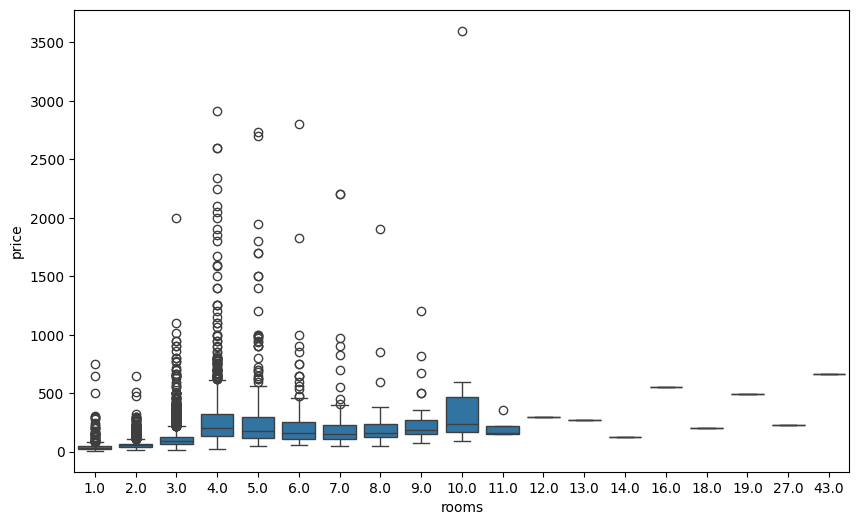

In [949]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='rooms', y='price', data=data)

# (Optional) Display the plot
plt.show()

<Axes: xlabel='area_type'>

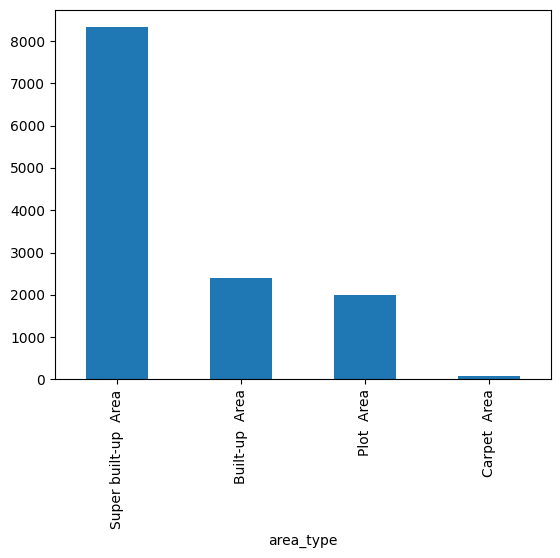

In [950]:
data['area_type'].value_counts().plot(kind='bar')

In [951]:
data['price']=data['price']*100000
data['ppa']=data['price']/data['total_sqft']

In [952]:
data['price_range'] = pd.qcut(data['price'], q=4, labels=['low', 'medium', 'high', 'very_high'])
data['ppavalue']=pd.qcut(data['ppa'], q=4, labels=['low', 'medium', 'high', 'very_high'])

In [953]:
data.sort_values(by='ppa')

area_type   availability          location society  \
5977         Built-up  Area  Ready To Move        Chandapura  others   
12068        Built-up  Area  Ready To Move       Thanisandra  others   
6766   Super built-up  Area  Ready To Move    Horamavu Agara  others   
3012   Super built-up  Area  Ready To Move    Kanakpura Road  others   
1282         Built-up  Area  Ready To Move    Kanakpura Road  others   
...                     ...            ...               ...     ...   
4972         Built-up  Area  Ready To Move            others  others   
5453             Plot  Area  Ready To Move            others  others   
9423             Plot  Area  Ready To Move  Ramamurthy Nagar  others   
7334             Plot  Area  Ready To Move    Kanakpura Road  others   
4086             Plot  Area  Ready To Move    Sarjapur  Road  others   

       total_sqft  bath  balcony       price  rooms  hall  kitchen  \
5977     120851.0   3.0      2.0   4200000.0    3.0     1        1   
12068    299997.0   6.0      0.0  11000000.0    6.0     1        1   
6766     110783.0   2.0      1.0   4151000.0    2.0     1        1   
3012     141959.0   2.0      1.0   5900000.0    3.0     1        1   
1282     155867.0   2.0      2.0   6500000.0    3.0     1        1   
...           ...   ...      ...         ...    ...   ...      ...   
4972          5.0   7.0      3.0  11500000.0    7.0     1        1   
5453          3.0   6.0      3.0   7500000.0    6.0     1        1   
9423          1.0   1.0      1.0   4800000.0    1.0     0        0   
7334          2.0   1.0      0.0  12500000.0    1.0     0        0   
4086          1.0   4.0      NaN  12000000.0    4.0     1        1   

                ppa price_range   ppavalue  
5977   3.475354e+01         low        low  
12068  3.666703e+01        high        low  
6766   3.746965e+01         low        low  
3012   4.156130e+01      medium        low  
1282   4.170222e+01      medium        low  
...             ...         ...        ...  
4972   2.300000e+06        high  very_high  
5453   2.500000e+06        high  very_high  
9423   4.800000e+06         low  very_high  
7334   6.250000e+06   very_high  very_high  
4086   1.200000e+07        high  very_high  

[12791 rows x 14 columns]

In [954]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12791 entries, 0 to 13318
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   area_type     12791 non-null  object  
 1   availability  12791 non-null  object  
 2   location      12791 non-null  object  
 3   society       12791 non-null  object  
 4   total_sqft    12791 non-null  float64 
 5   bath          12718 non-null  float64 
 6   balcony       12186 non-null  float64 
 7   price         12791 non-null  float64 
 8   rooms         12775 non-null  float64 
 9   hall          12791 non-null  int64   
 10  kitchen       12791 non-null  int64   
 11  ppa           12791 non-null  float64 
 12  price_range   12791 non-null  category
 13  ppavalue      12791 non-null  category
dtypes: category(2), float64(6), int64(2), object(4)
memory usage: 1.3+ MB


In [955]:
data.rooms.isnull().sum()

16

In [956]:
grouped_data1 = data.groupby(['price_range','ppavalue'])

# Calculate the median of 'bath' for each group
rooms_median = grouped_data1['rooms'].median().reset_index()
rooms_median


C:\Users\babab\AppData\Local\Temp\ipykernel_21336\3988977492.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data1 = data.groupby(['price_range','ppavalue'])


price_range   ppavalue  rooms
0          low        low    2.0
1          low     medium    2.0
2          low       high    1.0
3          low  very_high    1.0
4       medium        low    3.0
5       medium     medium    2.0
6       medium       high    2.0
7       medium  very_high    2.0
8         high        low    3.0
9         high     medium    3.0
10        high       high    3.0
11        high  very_high    3.0
12   very_high        low    4.0
13   very_high     medium    4.0
14   very_high       high    3.0
15   very_high  very_high    4.0

In [957]:
def fill_bath(row, rooms_median):
    if pd.isna(row['rooms']):  # Check if 'bath' is NaN
        # Find the corresponding median value for the same price_range and ppa
        median_rooms = rooms_median[(rooms_median['price_range'] == row['price_range']) & (rooms_median['ppavalue'] == row['ppavalue'])]['rooms']
        
        if not median_rooms.empty:
            return median_rooms.values[0]  # Return the median value
        else:
            return row['rooms']  # If no median available, keep it as NaN
    else:
        return row['rooms']  # If not NaN, keep the original value

In [958]:
data['rooms'] = data.apply(lambda row: fill_bath(row, rooms_median), axis=1)

In [959]:
data['rooms'].isnull().sum()

0

<Axes: xlabel='area_type', ylabel='rooms'>

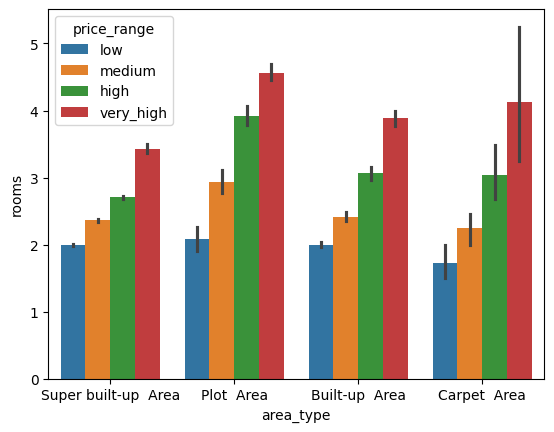

In [960]:
sns.barplot(x=data['area_type'],y=data['rooms'],hue=data['price_range'])

In [961]:
data[data['bath'].isnull()][['area_type','bath','rooms','price_range','ppavalue','ppa']]

area_type  bath  rooms price_range   ppavalue           ppa
56           Built-up  Area   NaN    4.0   very_high       high   5981.308411
81           Built-up  Area   NaN    4.0   very_high       high   7007.960044
224    Super built-up  Area   NaN    3.0        high     medium   4590.184049
344    Super built-up  Area   NaN    1.0         low        low   4100.952381
579              Plot  Area   NaN    2.0         low        low   1899.166667
...                     ...   ...    ...         ...        ...           ...
11496  Super built-up  Area   NaN    1.0         low     medium   5142.857143
11569            Plot  Area   NaN    2.0         low        low    625.185185
12768        Built-up  Area   NaN    5.0   very_high  very_high  10996.884735
12861  Super built-up  Area   NaN    4.0        high     medium   5300.043802
13240  Super built-up  Area   NaN    1.0      medium     medium   4890.232558

[73 rows x 6 columns]

In [962]:
# Group by price range and number of rooms
grouped_data = data.groupby(['price_range','ppavalue','rooms'])

# Calculate the median of 'bath' for each group
bath_median = grouped_data['bath'].median().reset_index()
bath_median


C:\Users\babab\AppData\Local\Temp\ipykernel_21336\2378175580.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(['price_range','ppavalue','rooms'])


price_range   ppavalue  rooms  bath
0           low        low    1.0   1.0
1           low        low    2.0   2.0
2           low        low    3.0   2.0
3           low        low    4.0   2.0
4           low        low    5.0   6.0
..          ...        ...    ...   ...
299   very_high  very_high   16.0   NaN
300   very_high  very_high   18.0  18.0
301   very_high  very_high   19.0  16.0
302   very_high  very_high   27.0   NaN
303   very_high  very_high   43.0  40.0

[304 rows x 4 columns]

In [963]:
def fill_bath(row, bath_median):
    if pd.isna(row['bath']):  # Check if 'bath' is NaN
        # Find the corresponding median value for the same price_range and rooms
        median_bath = bath_median[
            (bath_median['price_range'] == row['price_range']) &
            (bath_median['rooms'] == row['rooms'])
        ]['bath']
        
        if not median_bath.empty:
            return median_bath.values[0]  # Return the median value
        else:
            return row['bath']  # If no median available, keep it as NaN
    else:
        return row['bath']  # If not NaN, keep the original value


In [964]:
data['bath'] = data.apply(lambda row: fill_bath(row, bath_median), axis=1)

In [965]:
data['bath'].isnull().sum()

0

In [966]:
data['bath'].isnull().sum()

0

In [967]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12791 entries, 0 to 13318
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   area_type     12791 non-null  object  
 1   availability  12791 non-null  object  
 2   location      12791 non-null  object  
 3   society       12791 non-null  object  
 4   total_sqft    12791 non-null  float64 
 5   bath          12791 non-null  float64 
 6   balcony       12186 non-null  float64 
 7   price         12791 non-null  float64 
 8   rooms         12791 non-null  float64 
 9   hall          12791 non-null  int64   
 10  kitchen       12791 non-null  int64   
 11  ppa           12791 non-null  float64 
 12  price_range   12791 non-null  category
 13  ppavalue      12791 non-null  category
dtypes: category(2), float64(6), int64(2), object(4)
memory usage: 1.3+ MB


In [968]:
data[(data['kitchen']==0) & (data['rooms']>1)]

area_type          availability        location society  total_sqft  \
579    Plot  Area  Immediate Possession  Sarjapur  Road  others      1800.0   
1775   Plot  Area  Immediate Possession          others  others      3817.0   
2264   Plot  Area  Immediate Possession    Banashankari  others      2400.0   
2809   Plot  Area  Immediate Possession  Sarjapur  Road  others      1800.0   
2862   Plot  Area  Immediate Possession     Devanahalli  others      1950.0   
5333   Plot  Area  Immediate Possession     Devanahalli  others      3752.5   
6423   Plot  Area  Immediate Possession      Whitefield  others      2324.0   
6636   Plot  Area  Immediate Possession          Jigani  others      1500.0   
6719   Plot  Area  Immediate Possession         Hoskote  others      1730.0   
7680   Plot  Area  Immediate Possession    Kasavanhalli  others      5000.0   
8306   Plot  Area  Immediate Possession          Anekal  others      1453.0   
8565   Plot  Area  Immediate Possession          others  others      2000.0   
8703   Plot  Area  Immediate Possession     Mysore Road  others      1800.0   
10634  Plot  Area  Immediate Possession          others  others      1575.0   
11019  Plot  Area  Immediate Possession       Yelahanka  others      1500.0   
11569  Plot  Area  Immediate Possession      Hosur Road  others      1350.0   

       bath  balcony       price  rooms  hall  kitchen           ppa  \
579     2.0      NaN   3418500.0    2.0     0        0   1899.166667   
1775    4.0      NaN  12400000.0    4.0     0        0   3248.624574   
2264    4.0      NaN  46000000.0    4.0     0        0  19166.666667   
2809    2.0      NaN   2878500.0    2.0     0        0   1599.166667   
2862    2.0      NaN   4680000.0    2.0     0        0   2400.000000   
5333    4.0      NaN  17711500.0    4.0     0        0   4719.920053   
6423    2.0      NaN   2673000.0    2.0     0        0   1150.172117   
6636    2.0      NaN   2549000.0    2.0     0        0   1699.333333   
6719    2.0      NaN   2854500.0    2.0     0        0   1650.000000   
7680    4.0      NaN  40000000.0    4.0     0        0   8000.000000   
8306    2.0      NaN   1650000.0    2.0     0        0   1135.581555   
8565    3.0      NaN  12000000.0    3.0     0        0   6000.000000   
8703    2.0      NaN   4230000.0    2.0     0        0   2350.000000   
10634   2.0      NaN   3111000.0    2.0     0        0   1975.238095   
11019   2.0      NaN   1275000.0    2.0     0        0    850.000000   
11569   2.0      NaN    844000.0    2.0     0        0    625.185185   

      price_range   ppavalue  
579           low        low  
1775    very_high        low  
2264    very_high  very_high  
2809          low        low  
2862          low        low  
5333    very_high     medium  
6423          low        low  
6636          low        low  
6719          low        low  
7680    very_high  very_high  
8306          low        low  
8565         high       high  
8703          low        low  
10634         low        low  
11019         low        low  
11569         low        low

In [969]:
data['kitchen'].value_counts()

kitchen
1    12671
0      120
Name: count, dtype: int64

In [970]:
data.loc[(data['kitchen']==0) & (data['rooms']>1),'kitchen']=1

In [971]:
data['kitchen'].value_counts()

kitchen
1    12687
0      104
Name: count, dtype: int64

In [972]:
data.loc[(data['hall']==0) & (data['rooms']>1),'hall']=1

so here i have considered an assumption that if a house contains room greater than 1 it would have a kitchen and a hall

In [973]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12791 entries, 0 to 13318
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   area_type     12791 non-null  object  
 1   availability  12791 non-null  object  
 2   location      12791 non-null  object  
 3   society       12791 non-null  object  
 4   total_sqft    12791 non-null  float64 
 5   bath          12791 non-null  float64 
 6   balcony       12186 non-null  float64 
 7   price         12791 non-null  float64 
 8   rooms         12791 non-null  float64 
 9   hall          12791 non-null  int64   
 10  kitchen       12791 non-null  int64   
 11  ppa           12791 non-null  float64 
 12  price_range   12791 non-null  category
 13  ppavalue      12791 non-null  category
dtypes: category(2), float64(6), int64(2), object(4)
memory usage: 1.3+ MB


In [974]:
data

area_type   availability                  location  society  \
0      Super built-up  Area            Dec  Electronic City Phase II   others   
1                Plot  Area  Ready To Move          Chikka Tirupathi  Theanmp   
2            Built-up  Area  Ready To Move               Uttarahalli   others   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli  Soiewre   
4      Super built-up  Area  Ready To Move                  Kothanur   others   
...                     ...            ...                       ...      ...   
13314  Super built-up  Area  Ready To Move         Green Glen Layout   others   
13315        Built-up  Area  Ready To Move                Whitefield   others   
13316  Super built-up  Area  Ready To Move                    others   others   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   others   
13318  Super built-up  Area            Jun           Padmanabhanagar   others   

       total_sqft  bath  balcony       price  rooms  hall  kitchen  \
0          1056.0   2.0      1.0   3907000.0    2.0     1        1   
1          2600.0   5.0      3.0  12000000.0    4.0     1        1   
2          1440.0   2.0      3.0   6200000.0    3.0     1        1   
3          1521.0   3.0      1.0   9500000.0    3.0     1        1   
4          1200.0   2.0      1.0   5100000.0    2.0     1        1   
...           ...   ...      ...         ...    ...   ...      ...   
13314      1715.0   3.0      3.0  11200000.0    3.0     1        1   
13315      3453.0   4.0      0.0  23100000.0    5.0     1        1   
13316      3600.0   5.0      NaN  40000000.0    4.0     1        1   
13317      1141.0   2.0      1.0   6000000.0    2.0     1        1   
13318      4689.0   4.0      1.0  48800000.0    4.0     1        1   

                ppa price_range   ppavalue  
0       3699.810606         low        low  
1       4615.384615        high     medium  
2       4305.555556      medium     medium  
3       6245.890861        high       high  
4       4250.000000      medium        low  
...             ...         ...        ...  
13314   6530.612245        high       high  
13315   6689.834926   very_high       high  
13316  11111.111111   very_high  very_high  
13317   5258.545136      medium     medium  
13318  10407.336319   very_high  very_high  

[12791 rows x 14 columns]

<Axes: xlabel='balcony', ylabel='price_range'>

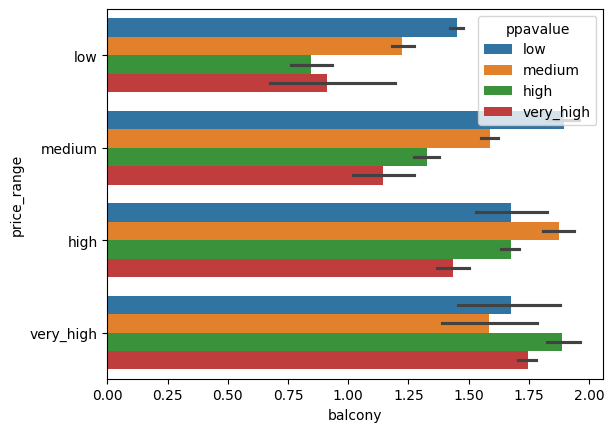

In [975]:
sns.barplot(x=data['balcony'],y=data['price_range'],hue=data['ppavalue'])

<Axes: xlabel='rooms', ylabel='balcony'>

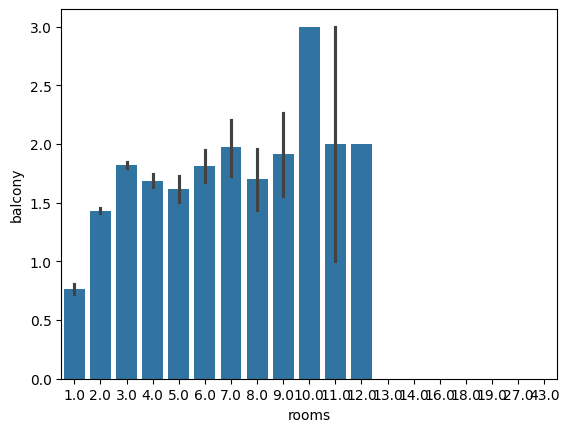

In [976]:
sns.barplot(x=data['rooms'], y=data['balcony'])

so by the chart we could fill nan values in balcony with 1 if the row has has got high or very high ppa value and low and med in price range , else 2  for all other cases

In [977]:
data.loc[(data['balcony'].isna()) & (data['ppavalue'].isin(['high', 'very high'])) & (data['price_range'].isin(['low', 'medium'])),'balcony']=1


In [978]:
data.loc[(data['balcony'].isna()) & ((data['rooms']>1)| data['price_range'].isin(['high'])),'balcony']=2

In [979]:
data[data['balcony'].isna()]

area_type   availability        location  society  \
344    Super built-up  Area            Dec  Kanakpura Road  PrarePa   
1686   Super built-up  Area            Dec      Whitefield   others   
5747   Super built-up  Area            Apr  Kanakpura Road  PrarePa   
11496  Super built-up  Area            Dec  Kanakpura Road  PrarePa   
13240  Super built-up  Area  Ready To Move     Devanahalli   others   

       total_sqft  bath  balcony      price  rooms  hall  kitchen  \
344         525.0   1.0      NaN  2153000.0    1.0     1        1   
1686        665.0   1.0      NaN  2858500.0    1.0     1        1   
5747        525.0   1.0      NaN  2700000.0    1.0     1        1   
11496       525.0   1.0      NaN  2700000.0    1.0     1        1   
13240      1075.0   1.0      NaN  5257000.0    1.0     1        1   

               ppa price_range ppavalue  
344    4100.952381         low      low  
1686   4298.496241         low   medium  
5747   5142.857143         low   medium  
11496  5142.857143         low   medium  
13240  4890.232558      medium   medium

In [980]:
data['balcony']=data['balcony'].fillna(0)

In [981]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12791 entries, 0 to 13318
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   area_type     12791 non-null  object  
 1   availability  12791 non-null  object  
 2   location      12791 non-null  object  
 3   society       12791 non-null  object  
 4   total_sqft    12791 non-null  float64 
 5   bath          12791 non-null  float64 
 6   balcony       12791 non-null  float64 
 7   price         12791 non-null  float64 
 8   rooms         12791 non-null  float64 
 9   hall          12791 non-null  int64   
 10  kitchen       12791 non-null  int64   
 11  ppa           12791 non-null  float64 
 12  price_range   12791 non-null  category
 13  ppavalue      12791 non-null  category
dtypes: category(2), float64(6), int64(2), object(4)
memory usage: 1.3+ MB


lets visualize each column as univariate analysis

In [982]:
data

area_type   availability                  location  society  \
0      Super built-up  Area            Dec  Electronic City Phase II   others   
1                Plot  Area  Ready To Move          Chikka Tirupathi  Theanmp   
2            Built-up  Area  Ready To Move               Uttarahalli   others   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli  Soiewre   
4      Super built-up  Area  Ready To Move                  Kothanur   others   
...                     ...            ...                       ...      ...   
13314  Super built-up  Area  Ready To Move         Green Glen Layout   others   
13315        Built-up  Area  Ready To Move                Whitefield   others   
13316  Super built-up  Area  Ready To Move                    others   others   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   others   
13318  Super built-up  Area            Jun           Padmanabhanagar   others   

       total_sqft  bath  balcony       price  rooms  hall  kitchen  \
0          1056.0   2.0      1.0   3907000.0    2.0     1        1   
1          2600.0   5.0      3.0  12000000.0    4.0     1        1   
2          1440.0   2.0      3.0   6200000.0    3.0     1        1   
3          1521.0   3.0      1.0   9500000.0    3.0     1        1   
4          1200.0   2.0      1.0   5100000.0    2.0     1        1   
...           ...   ...      ...         ...    ...   ...      ...   
13314      1715.0   3.0      3.0  11200000.0    3.0     1        1   
13315      3453.0   4.0      0.0  23100000.0    5.0     1        1   
13316      3600.0   5.0      2.0  40000000.0    4.0     1        1   
13317      1141.0   2.0      1.0   6000000.0    2.0     1        1   
13318      4689.0   4.0      1.0  48800000.0    4.0     1        1   

                ppa price_range   ppavalue  
0       3699.810606         low        low  
1       4615.384615        high     medium  
2       4305.555556      medium     medium  
3       6245.890861        high       high  
4       4250.000000      medium        low  
...             ...         ...        ...  
13314   6530.612245        high       high  
13315   6689.834926   very_high       high  
13316  11111.111111   very_high  very_high  
13317   5258.545136      medium     medium  
13318  10407.336319   very_high  very_high  

[12791 rows x 14 columns]

In [983]:
data.describe(include='all')

area_type   availability location society     total_sqft  \
count                  12791          12791    12791   12791   12791.000000   
unique                     4             14      250     138            NaN   
top     Super built-up  Area  Ready To Move   others  others            NaN   
freq                    8317          10172     2789   10220            NaN   
mean                     NaN            NaN      NaN     NaN    2520.729732   
std                      NaN            NaN      NaN     NaN   14090.631084   
min                      NaN            NaN      NaN     NaN       1.000000   
25%                      NaN            NaN      NaN     NaN    1100.000000   
50%                      NaN            NaN      NaN     NaN    1284.000000   
75%                      NaN            NaN      NaN     NaN    1700.000000   
max                      NaN            NaN      NaN     NaN  566584.000000   

                bath       balcony         price         rooms          hall  \
count   12791.000000  12791.000000  1.279100e+04  12791.000000  12791.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        2.710578      1.600813  1.143176e+07      2.817528      0.990853   
std         1.356378      0.808369  1.514803e+07      1.311408      0.095206   
min         1.000000      0.000000  8.000000e+05      1.000000      0.000000   
25%         2.000000      1.000000  5.000000e+06      2.000000      1.000000   
50%         2.000000      2.000000  7.300000e+06      3.000000      1.000000   
75%         3.000000      2.000000  1.210000e+07      3.000000      1.000000   
max        40.000000      3.000000  3.600000e+08     43.000000      1.000000   

             kitchen           ppa price_range ppavalue  
count   12791.000000  1.279100e+04       12791    12791  
unique           NaN           NaN           4        4  
top              NaN           NaN         low   medium  
freq             NaN           NaN        3299     3205  
mean        0.991869  9.609727e+03         NaN      NaN  
std         0.089807  1.336975e+05         NaN      NaN  
min         0.000000  3.475354e+01         NaN      NaN  
25%         1.000000  4.272727e+03         NaN      NaN  
50%         1.000000  5.454545e+03         NaN      NaN  
75%         1.000000  7.378985e+03         NaN      NaN  
max         1.000000  1.200000e+07         NaN      NaN

In [984]:
cleaned_raw_dataset=data_copied

In [985]:
cleaned_raw_dataset['total_sqft']=data['total_sqft']

In [986]:
cleaned_raw_dataset.dropna(inplace=True)

In [987]:
cleaned_raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7144 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     7144 non-null   object 
 1   availability  7144 non-null   object 
 2   location      7144 non-null   object 
 3   size          7144 non-null   object 
 4   society       7144 non-null   object 
 5   total_sqft    7144 non-null   float64
 6   bath          7144 non-null   float64
 7   balcony       7144 non-null   float64
 8   price         7144 non-null   float64
dtypes: float64(4), object(5)
memory usage: 558.1+ KB


In [988]:
cleaned_raw_dataset

area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
5      Super built-up  Area  Ready To Move                Whitefield   
11               Plot  Area  Ready To Move                Whitefield   
...                     ...            ...                       ...   
13308        Built-up  Area  Ready To Move         Bannerghatta Road   
13314  Super built-up  Area  Ready To Move         Green Glen Layout   
13315        Built-up  Area  Ready To Move                Whitefield   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   

            size  society  total_sqft  bath  balcony   price  
0          2 BHK  Coomee       1056.0   2.0      1.0   39.07  
1      4 Bedroom  Theanmp      2600.0   5.0      3.0  120.00  
3          3 BHK  Soiewre      1521.0   3.0      1.0   95.00  
5          2 BHK  DuenaTa      1170.0   2.0      1.0   38.00  
11     4 Bedroom  Prrry M      2785.0   5.0      3.0  295.00  
...          ...      ...         ...   ...      ...     ...  
13308      3 BHK  Baanise      1527.0   3.0      1.0  142.00  
13314      3 BHK  SoosePr      1715.0   3.0      3.0  112.00  
13315  5 Bedroom  ArsiaEx      3453.0   4.0      0.0  231.00  
13317      2 BHK  Mahla T      1141.0   2.0      1.0   60.00  
13318      4 BHK  SollyCl      4689.0   4.0      1.0  488.00  

[7144 rows x 9 columns]

In [989]:
X=cleaned_raw_dataset.drop(columns=['price'])
Y=cleaned_raw_dataset['price']

In [990]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline

In [991]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
x_train.shape,x_test.shape

((5715, 8), (1429, 8))

In [992]:
s=StandardScaler()
lr=LinearRegression()
#coltrans= ColumnTransformer([(OneHotEncoder(sparse=False), ['area_type', 'availability', 'location'])], remainder='passthrough')
coltrans = ColumnTransformer([('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), ['area_type', 'availability', 'location','size','society'])], remainder='passthrough')
pipe=make_pipeline(coltrans,s,lr)
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['area_type', 'availability',
                                                   'location', 'size',
                                                   'society'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [993]:
lasso=Lasso()
pipe1=make_pipeline(coltrans,s,lasso)
pipe1.fit(x_train,y_train)
ridge=Ridge()
pipe2=make_pipeline(coltrans,s,ridge)
pipe2.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['area_type', 'availability',
                                                   'location', 'size',
                                                   'society'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [994]:
ypredlr=pipe.predict(x_test)
ypredlasso=pipe1.predict(x_test)
ypredridge=pipe2.predict(x_test)

In [995]:
r2lr=r2_score(y_test,ypredlr)
r2lasso=r2_score(y_test,ypredlasso)
r2ridge=r2_score(y_test,ypredridge)

In [996]:
print(r2lr,r2lasso,r2ridge)

-1.512197092556732e+27 0.7539694714063292 0.7357426504183373


In [997]:
def conv(series):

    if series.dtype == 'object':
        unique_values = series.unique()
        value_map = {value: i + 1 for i, value in enumerate(unique_values)}
        series = series.map(value_map)

    return series

In [998]:
data['area_type']=conv(data['area_type'])
data['area_type'].value_counts()

area_type
1    8317
3    2398
2    1989
4      87
Name: count, dtype: int64

In [999]:
data['availability']=conv(data['availability'])

In [1000]:
data['location']=conv(data['availability'])

In [1001]:
data

area_type  availability  location  society  total_sqft  bath  balcony  \
0              1             1         1   others      1056.0   2.0      1.0   
1              2             2         2  Theanmp      2600.0   5.0      3.0   
2              3             2         2   others      1440.0   2.0      3.0   
3              1             2         2  Soiewre      1521.0   3.0      1.0   
4              1             2         2   others      1200.0   2.0      1.0   
...          ...           ...       ...      ...         ...   ...      ...   
13314          1             2         2   others      1715.0   3.0      3.0   
13315          3             2         2   others      3453.0   4.0      0.0   
13316          1             2         2   others      3600.0   5.0      2.0   
13317          3             2         2   others      1141.0   2.0      1.0   
13318          1            11        11   others      4689.0   4.0      1.0   

            price  rooms  hall  kitchen           ppa price_range   ppavalue  
0       3907000.0    2.0     1        1   3699.810606         low        low  
1      12000000.0    4.0     1        1   4615.384615        high     medium  
2       6200000.0    3.0     1        1   4305.555556      medium     medium  
3       9500000.0    3.0     1        1   6245.890861        high       high  
4       5100000.0    2.0     1        1   4250.000000      medium        low  
...           ...    ...   ...      ...           ...         ...        ...  
13314  11200000.0    3.0     1        1   6530.612245        high       high  
13315  23100000.0    5.0     1        1   6689.834926   very_high       high  
13316  40000000.0    4.0     1        1  11111.111111   very_high  very_high  
13317   6000000.0    2.0     1        1   5258.545136      medium     medium  
13318  48800000.0    4.0     1        1  10407.336319   very_high  very_high  

[12791 rows x 14 columns]

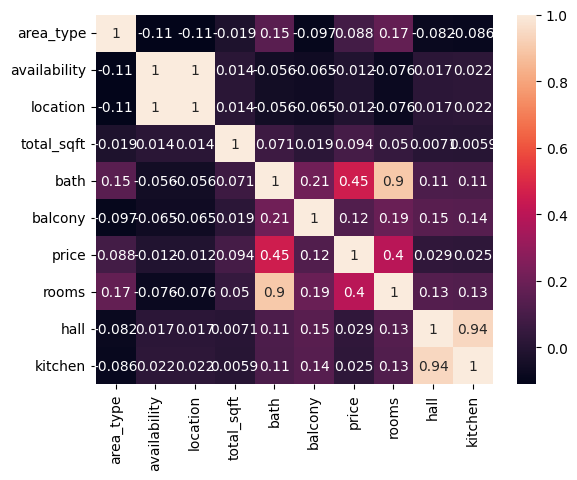

area_type  availability  location  total_sqft      bath  \
area_type      1.000000     -0.110176 -0.110176   -0.019381  0.147244   
availability  -0.110176      1.000000  1.000000    0.014215 -0.056105   
location      -0.110176      1.000000  1.000000    0.014215 -0.056105   
total_sqft    -0.019381      0.014215  0.014215    1.000000  0.071338   
bath           0.147244     -0.056105 -0.056105    0.071338  1.000000   
balcony       -0.096951     -0.065429 -0.065429    0.019208  0.207664   
price          0.088231     -0.012240 -0.012240    0.093644  0.454328   
rooms          0.171944     -0.076027 -0.076027    0.050166  0.899698   
hall          -0.082236      0.017386  0.017386    0.007130  0.114515   
kitchen       -0.086282      0.022277  0.022277    0.005930  0.107126   

               balcony     price     rooms      hall   kitchen  
area_type    -0.096951  0.088231  0.171944 -0.082236 -0.086282  
availability -0.065429 -0.012240 -0.076027  0.017386  0.022277  
location     -0.065429 -0.012240 -0.076027  0.017386  0.022277  
total_sqft    0.019208  0.093644  0.050166  0.007130  0.005930  
bath          0.207664  0.454328  0.899698  0.114515  0.107126  
balcony       1.000000  0.124231  0.192666  0.145576  0.138376  
price         0.124231  1.000000  0.395450  0.029304  0.024625  
rooms         0.192666  0.395450  1.000000  0.133167  0.125487  
hall          0.145576  0.029304  0.133167  1.000000  0.942326  
kitchen       0.138376  0.024625  0.125487  0.942326  1.000000

In [1002]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data[['area_type','availability','location','total_sqft','bath','balcony','price','rooms','hall','kitchen']].corr()

sns.heatmap(correlation_matrix, annot=True)
plt.show()
correlation_matrix

lets remove outliiers causing mess with model

<Axes: xlabel='price', ylabel='Density'>

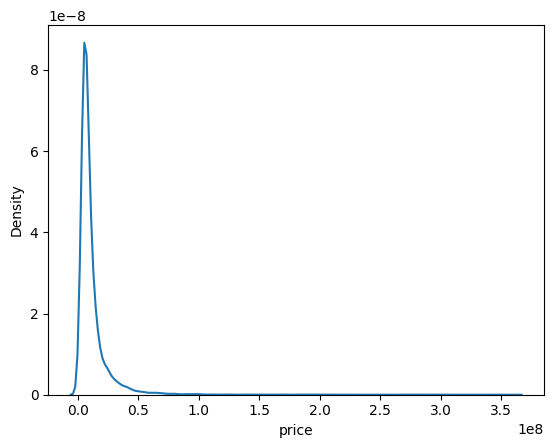

In [1003]:
sns.kdeplot(data=data,x='price')

<Axes: xlabel='rooms', ylabel='Density'>

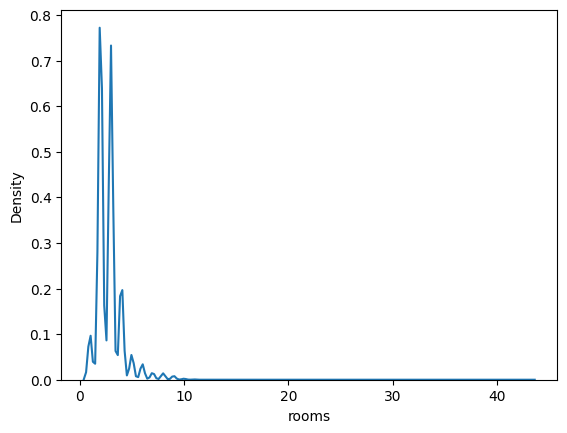

In [1004]:
sns.kdeplot(data=data,x='rooms')

here by the graph we could say that the pottential outliers do have lot of rooms 
- rooms more than 12 could be considered outliers
= lets verify the same with zscore

<Axes: ylabel='rooms'>

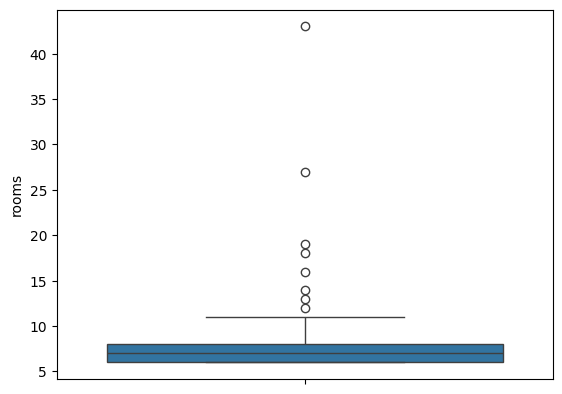

In [1005]:
zscore=((data['rooms'])-(data['rooms'].mean())/data['rooms'].std())
outliers=data[zscore>3]
sns.boxplot(outliers['rooms'])

In [1006]:
indexes=data[(data['rooms']>12)].index
data.drop(index=indexes , axis=0 , inplace=True)

<Axes: xlabel='total_sqft', ylabel='Density'>

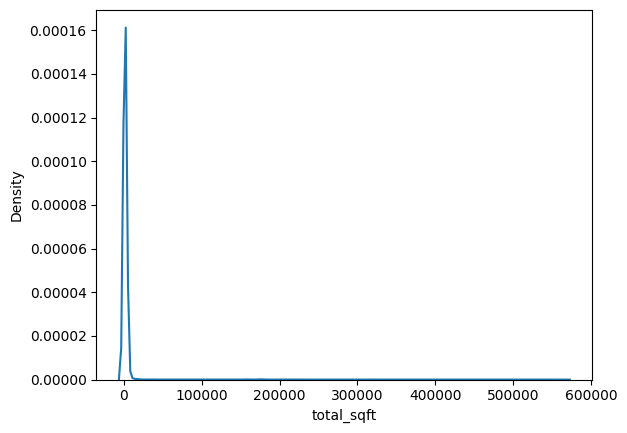

In [1007]:
sns.kdeplot(data=data,x='total_sqft')

In [1008]:
z_scores = (data['total_sqft'] - data['total_sqft'].mean()) / data['total_sqft'].std()

outliers = data[z_scores > 1]
outliers[~outliers['price_range'].isin(['high','very_high'])].sort_values(by='total_sqft')

area_type  availability  location  society  total_sqft  bath  balcony  \
3067           2             2         2   others     46182.0   1.0      1.0   
2036           1             2         2   others     58191.0   2.0      1.0   
1484           4             8         8  Arcia S     68732.5   2.0      0.0   
10907          4             2         2   others     86628.0   2.0      0.0   
3350           1            13        13  Soresea    102007.0   2.0      1.0   
6766           1             2         2   others    110783.0   2.0      1.0   
5472           1             2         2   others    111312.0   2.0      2.0   
393            1             2         2   others    111327.0   2.0      2.0   
2228           4             2         2   others    112876.0   3.0      0.0   
5977           3             2         2   others    120851.0   3.0      2.0   
6826           1             2         2   others    126667.0   2.0      0.0   
1638           1             2         2   others    126972.0   2.0      2.0   
13123          1             2         2   others    133195.0   2.0      2.0   
11162          3             2         2   others    137007.0   3.0      1.0   
10719          1             2         2   others    141959.0   2.0      1.0   
3012           1             2         2   others    141959.0   2.0      1.0   
1282           3             2         2   others    155867.0   2.0      2.0   

           price  rooms  hall  kitchen        ppa price_range ppavalue  
3067   3170000.0    1.0     0        0  68.641462         low      low  
2036   2500000.0    1.0     1        1  42.961970         low      low  
1484   4272000.0    2.0     1        1  62.154003         low      low  
10907  3638000.0    2.0     1        1  41.995660         low      low  
3350   6838000.0    2.0     1        1  67.034615      medium      low  
6766   4151000.0    2.0     1        1  37.469648         low      low  
5472   5500000.0    2.0     1        1  49.410666      medium      low  
393    5300000.0    2.0     1        1  47.607499      medium      low  
2228   4740500.0    3.0     1        1  41.997413         low      low  
5977   4200000.0    3.0     1        1  34.753539         low      low  
6826   6900000.0    2.0     1        1  54.473541      medium      low  
1638   6800000.0    2.0     1        1  53.555115      medium      low  
13123  6900000.0    2.0     1        1  51.803746      medium      low  
11162  6500000.0    3.0     1        1  47.442831      medium      low  
10719  6500000.0    3.0     1        1  45.787868      medium      low  
3012   5900000.0    3.0     1        1  41.561296      medium      low  
1282   6500000.0    3.0     1        1  41.702220      medium      low

here as per the observed data , the house with large total area should also be high prices comparitively but here whiel are being very large we could observe the price being too low , which doesnt justify hence could be treated as outliers

In [1009]:
indexes=outliers[~outliers['price_range'].isin(['high','very_high'])].sort_values(by='total_sqft').index
data.drop(index=indexes,axis=0,inplace=True)

In [1010]:
data['ppa'].median(),data['ppa'].mean()

(5454.545454545455, 9620.51205287476)

In [1011]:
data[z_scores>3].sort_values(by='ppa',ascending=True)

C:\Users\babab\AppData\Local\Temp\ipykernel_21336\3839092829.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[z_scores>3].sort_values(by='ppa',ascending=True)


area_type  availability  location  society  total_sqft  bath  balcony  \
12068          3             2         2   others    299997.0   6.0      0.0   
10333          1             2         2   others    177726.0   3.0      2.0   
11270          1             2         2   others    177726.0   3.0      2.0   
4512           1             2         2   others    173246.0   3.0      2.0   
3591           1             2         2   others    168928.0   3.0      2.0   
4201           1             2         2   others    162786.0   3.0      2.0   
8870           1             7         7  SoisoCa    208701.0   3.0      2.0   
1976           1             2         2   others    217265.0   3.0      3.0   
9273           1             6         6   others    176325.0   3.0      3.0   
6858           1             2         2   others    177726.0   3.0      2.0   
2595           1             2         2   others    177642.0   3.0      2.0   
11943          1             2         2  SoisoCa    216203.0   4.0      2.0   
12329          1             2         2   others    162329.0   2.0      2.0   
9366           1             2         2  SoisoCa    208701.0   4.0      2.0   
3499           1             2         2   others    158401.0   3.0      1.0   
11000          1             2         2   others    158401.0   3.0      1.0   
2394           1             2         2   others    175212.0   3.0      2.0   
142            1             2         2   others    156305.0   3.0      1.0   
3533           1            13        13  Soresea    120547.0   2.0      1.0   
999            1             2         2  SoisoCa    211295.0   4.0      2.0   
2949           1             3         3  SoineC     145219.0   2.0      1.0   
44             1             7         7  Soazak     133074.0   2.0      2.0   
7442           1             2         2   others    227424.0   4.0      1.0   
11243          1             2         2   others    175212.0   3.0      2.0   
1330           1             3         3  SoineC     346786.0   6.0      3.0   
8020           1             3         3  SoineC     318100.0   4.0      2.0   
2475           1             2         2   others    145255.0   2.0      3.0   
7103           1             2         2   others    175212.0   3.0      2.0   
12557          1             2         2  SoisoCa    208701.0   4.0      2.0   
5521           1             8         8  Sosisic    152584.0   3.0      1.0   
448            1             2         2   others    175212.0   3.0      2.0   
7749           1             2         2   others    154214.0   3.0      3.0   
3174           1             3         3  SoineC     318100.0   4.0      0.0   
2500           1             3         3  SoineC     318100.0   4.0      2.0   
7579           1             2         2   others     94755.0   2.0      1.0   
1925           1             2         2   others    247913.0   3.0      1.0   
3650           1             3         3  SoineC     181918.0   3.0      1.0   
11090          1            12        12   others    124852.0   3.0      2.0   
6185           1             3         3   others    181918.0   3.0      2.0   
12843          1             3         3  SoineC     193247.0   3.0      2.0   
9369           1             3         3  SoineC     224981.0   4.0      2.0   
373            1             8         8   others    202371.0   3.0      2.0   
12170          1             8         8   others    217166.0   3.0      2.0   
10230          2             2         2   others    168812.0   2.0      1.0   
10223          2             2         2   others    280125.0   4.0      1.0   
13086          1             2         2   others    566584.0   7.0      2.0   
12757          1             9         9   others    277729.0   5.0      2.0   
5695           1            13        13   others    277729.0   5.0      2.0   
1894           2             2         2   others     52272.0   2.0      1.0   

      

In [1012]:
z_scores = (data['price'] - data['price'].mean()) / data['price'].std()

outliers = data[z_scores > 1]
outliers.sort_values(by='price')

area_type  availability  location  society  total_sqft  bath  balcony  \
8200           3             2         2   others      2500.0   3.0      1.0   
2142           1            13        13   others      3012.0   6.0      2.0   
10072          1             2         2  Brway G      1640.0   3.0      2.0   
12984          1             2         2  Emine P      3596.0   4.0      2.0   
5985           1             2         2   others      3317.5   5.0      0.0   
...          ...           ...       ...      ...         ...   ...      ...   
3180           1             2         2   others      8321.0   5.0      3.0   
11763          2             2         2   others      9600.0   7.0      2.0   
13200          2             2         2   others      8000.0   6.0      3.0   
11080          1            12        12   others      8321.0   5.0      2.0   
13067          2             2         2   others      7150.0  13.0      2.0   

             price  rooms  hall  kitchen           ppa price_range   ppavalue  
8200    26800000.0    3.0     1        1  10720.000000   very_high  very_high  
2142    26800000.0    4.0     1        1   8897.742364   very_high  very_high  
10072   26800000.0    3.0     1        1  16341.463415   very_high  very_high  
12984   26800000.0    4.0     1        1   7452.725250   very_high  very_high  
5985    26850000.0    4.0     1        1   8093.443858   very_high  very_high  
...            ...    ...   ...      ...           ...         ...        ...  
3180   270000000.0    5.0     1        1  32448.023074   very_high  very_high  
11763  273600000.0    5.0     1        1  28500.000000   very_high  very_high  
13200  280000000.0    6.0     1        1  35000.000000   very_high  very_high  
11080  291200000.0    4.0     1        1  34995.793775   very_high  very_high  
13067  360000000.0   10.0     1        1  50349.650350   very_high  very_high  

[923 rows x 14 columns]

<Axes: ylabel='price'>

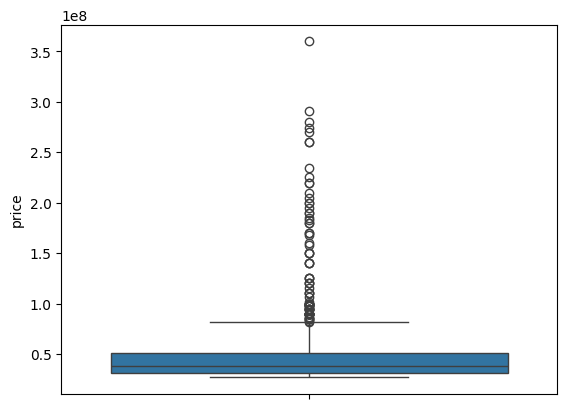

In [1013]:
sns.boxplot(outliers['price'])

so here i took price columns values which are 2-std away from mean, considering we have lotta values plots which are costliers than others, but again the outliers in the data could degrade the models performance and also it essential to keep the information (data) if its factual 

In [1014]:
indexes=outliers[outliers['price']>(1.2*(10**8))].index
data.drop(index=indexes,axis=0,inplace=True)

<Axes: xlabel='total_sqft', ylabel='Density'>

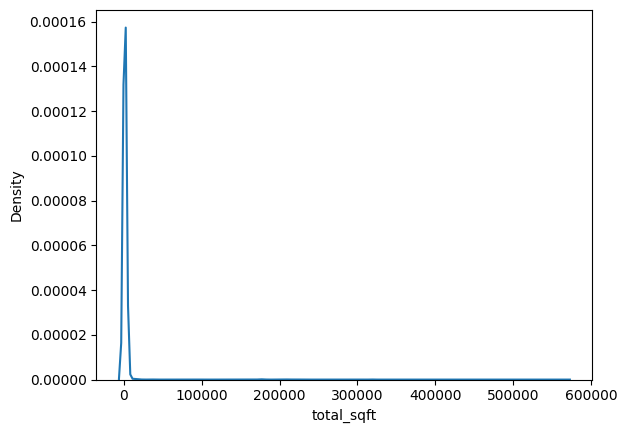

In [1015]:
sns.kdeplot(data['total_sqft'])

so here there were few data entries which are below min area of a room
- Smaller houses: Around 600-1,200 square feet, often found in more densely populated areas or older neighborhoods1.

In [1016]:
indexes=data[data['total_sqft']<500].index
data.drop(index=indexes,axis=0,inplace=True)

In [1017]:
data['total_sqft'].sort_values()

363         500.0
13076       500.0
9693        500.0
482         500.0
5651        500.0
           ...   
2500     318100.0
3174     318100.0
8020     318100.0
1330     346786.0
13086    566584.0
Name: total_sqft, Length: 12592, dtype: float64

In [1018]:
data

area_type  availability  location  society  total_sqft  bath  balcony  \
0              1             1         1   others      1056.0   2.0      1.0   
1              2             2         2  Theanmp      2600.0   5.0      3.0   
2              3             2         2   others      1440.0   2.0      3.0   
3              1             2         2  Soiewre      1521.0   3.0      1.0   
4              1             2         2   others      1200.0   2.0      1.0   
...          ...           ...       ...      ...         ...   ...      ...   
13314          1             2         2   others      1715.0   3.0      3.0   
13315          3             2         2   others      3453.0   4.0      0.0   
13316          1             2         2   others      3600.0   5.0      2.0   
13317          3             2         2   others      1141.0   2.0      1.0   
13318          1            11        11   others      4689.0   4.0      1.0   

            price  rooms  hall  kitchen           ppa price_range   ppavalue  
0       3907000.0    2.0     1        1   3699.810606         low        low  
1      12000000.0    4.0     1        1   4615.384615        high     medium  
2       6200000.0    3.0     1        1   4305.555556      medium     medium  
3       9500000.0    3.0     1        1   6245.890861        high       high  
4       5100000.0    2.0     1        1   4250.000000      medium        low  
...           ...    ...   ...      ...           ...         ...        ...  
13314  11200000.0    3.0     1        1   6530.612245        high       high  
13315  23100000.0    5.0     1        1   6689.834926   very_high       high  
13316  40000000.0    4.0     1        1  11111.111111   very_high  very_high  
13317   6000000.0    2.0     1        1   5258.545136      medium     medium  
13318  48800000.0    4.0     1        1  10407.336319   very_high  very_high  

[12592 rows x 14 columns]

In [1019]:
data[(data['total_sqft']<1000) & (data['rooms']>2)]

area_type  availability  location society  total_sqft  bath  balcony  \
45             2             2         2  others       600.0   9.0      2.0   
70             2             2         2  others       500.0   3.0      2.0   
89             2             2         2  others       710.0   6.0      3.0   
129            2             2         2  others       950.0   7.0      0.0   
176            2             2         2  others       600.0   3.0      2.0   
...          ...           ...       ...     ...         ...   ...      ...   
13045          2             2         2  others       600.0   6.0      2.0   
13052          2             2         2  others       600.0   5.0      2.0   
13063          2             2         2  others       770.0   3.0      2.0   
13073          2             2         2  others       600.0   3.0      2.0   
13303          2             2         2  others       774.0   5.0      3.0   

            price  rooms  hall  kitchen           ppa price_range   ppavalue  
45     20000000.0    8.0     1        1  33333.333333   very_high  very_high  
70     10000000.0    3.0     1        1  20000.000000        high  very_high  
89     16000000.0    6.0     1        1  22535.211268   very_high  very_high  
129    11500000.0    7.0     1        1  12105.263158        high  very_high  
176     8500000.0    5.0     1        1  14166.666667        high  very_high  
...           ...    ...   ...      ...           ...         ...        ...  
13045   6500000.0    6.0     1        1  10833.333333      medium  very_high  
13052   9900000.0    4.0     1        1  16500.000000        high  very_high  
13063   6525000.0    4.0     1        1   8474.025974      medium  very_high  
13073  10000000.0    4.0     1        1  16666.666667        high  very_high  
13303   7000000.0    5.0     1        1   9043.927649      medium  very_high  

[346 rows x 14 columns]

a house with more than single room who has got area under 100 sqfeet is kind of mess but in the dataset we do have such house where rooms are over 2
- these must be outliers

In [1020]:
indexes=data[(data['total_sqft']<1000) & (data['rooms']>2)].index
data.drop(index=indexes , axis=0,inplace=True)

In [1021]:
data

area_type  availability  location  society  total_sqft  bath  balcony  \
0              1             1         1   others      1056.0   2.0      1.0   
1              2             2         2  Theanmp      2600.0   5.0      3.0   
2              3             2         2   others      1440.0   2.0      3.0   
3              1             2         2  Soiewre      1521.0   3.0      1.0   
4              1             2         2   others      1200.0   2.0      1.0   
...          ...           ...       ...      ...         ...   ...      ...   
13314          1             2         2   others      1715.0   3.0      3.0   
13315          3             2         2   others      3453.0   4.0      0.0   
13316          1             2         2   others      3600.0   5.0      2.0   
13317          3             2         2   others      1141.0   2.0      1.0   
13318          1            11        11   others      4689.0   4.0      1.0   

            price  rooms  hall  kitchen           ppa price_range   ppavalue  
0       3907000.0    2.0     1        1   3699.810606         low        low  
1      12000000.0    4.0     1        1   4615.384615        high     medium  
2       6200000.0    3.0     1        1   4305.555556      medium     medium  
3       9500000.0    3.0     1        1   6245.890861        high       high  
4       5100000.0    2.0     1        1   4250.000000      medium        low  
...           ...    ...   ...      ...           ...         ...        ...  
13314  11200000.0    3.0     1        1   6530.612245        high       high  
13315  23100000.0    5.0     1        1   6689.834926   very_high       high  
13316  40000000.0    4.0     1        1  11111.111111   very_high  very_high  
13317   6000000.0    2.0     1        1   5258.545136      medium     medium  
13318  48800000.0    4.0     1        1  10407.336319   very_high  very_high  

[12246 rows x 14 columns]

guess thats it for the outliers removal
now lets check for the model performances once

lets drop the utility columns we created

In [1022]:
data.drop(columns=['price_range','ppavalue','ppa'],axis=1,inplace=True)

In [1023]:
data

area_type  availability  location  society  total_sqft  bath  balcony  \
0              1             1         1   others      1056.0   2.0      1.0   
1              2             2         2  Theanmp      2600.0   5.0      3.0   
2              3             2         2   others      1440.0   2.0      3.0   
3              1             2         2  Soiewre      1521.0   3.0      1.0   
4              1             2         2   others      1200.0   2.0      1.0   
...          ...           ...       ...      ...         ...   ...      ...   
13314          1             2         2   others      1715.0   3.0      3.0   
13315          3             2         2   others      3453.0   4.0      0.0   
13316          1             2         2   others      3600.0   5.0      2.0   
13317          3             2         2   others      1141.0   2.0      1.0   
13318          1            11        11   others      4689.0   4.0      1.0   

            price  rooms  hall  kitchen  
0       3907000.0    2.0     1        1  
1      12000000.0    4.0     1        1  
2       6200000.0    3.0     1        1  
3       9500000.0    3.0     1        1  
4       5100000.0    2.0     1        1  
...           ...    ...   ...      ...  
13314  11200000.0    3.0     1        1  
13315  23100000.0    5.0     1        1  
13316  40000000.0    4.0     1        1  
13317   6000000.0    2.0     1        1  
13318  48800000.0    4.0     1        1  

[12246 rows x 11 columns]

In [1024]:
XOR=data.drop(columns=['price'])
YOR=data['price']

Or=outlier removed

In [1025]:
x_trainOR,x_testOR,y_trainOR,y_testOR=train_test_split(XOR,YOR)

In [1026]:
x_trainOR.shape,x_testOR.shape,y_trainOR.shape,y_testOR.shape

((9184, 10), (3062, 10), (9184,), (3062,))

In [1027]:
lrOR=LinearRegression()
sOR=StandardScaler()
coltransOR = ColumnTransformer([('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), ['society'])], remainder='passthrough')
pipeOR1=make_pipeline(coltransOR,sOR,lrOR)

In [1028]:
pipeOR1.fit(x_trainOR,y_trainOR)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['society'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [1029]:
lassoOR=Lasso()
sOR=StandardScaler()
coltransOR = ColumnTransformer([('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), ['society'])], remainder='passthrough')
pipeOR2=make_pipeline(coltransOR,sOR,lassoOR)

In [1030]:
pipeOR2.fit(x_trainOR,y_trainOR)

C:\Users\babab\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.992e+16, tolerance: 1.176e+14
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['society'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [1031]:
ridgeOR=Ridge()
sOR=StandardScaler()
coltransOR = ColumnTransformer([('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), ['society'])], remainder='passthrough')
pipeOR3=make_pipeline(coltransOR,sOR,ridgeOR)

In [1032]:
pipeOR3.fit(x_trainOR,y_trainOR)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['society'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [1033]:
ORpred1=pipeOR1.predict(x_testOR)
ORpred2=pipeOR2.predict(x_testOR)
ORpred3=pipeOR3.predict(x_testOR)

In [1034]:
r2_score(ORpred1,y_testOR),r2_score(ORpred2,y_testOR),r2_score(ORpred3,y_testOR)

(-1.003368313171094, -1.0049986993093705, -1.005283193991537)

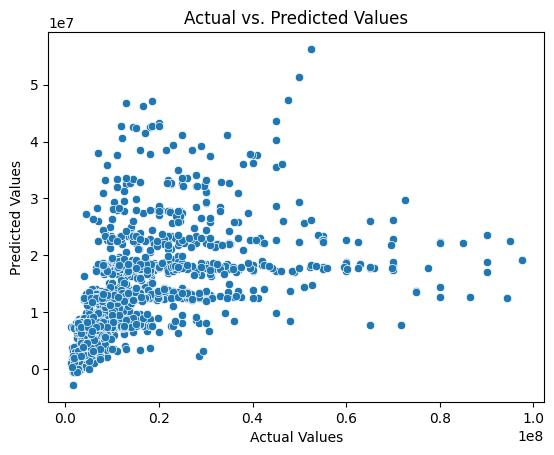

In [1035]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=y_testOR, y=ORpred1)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [1036]:
data

area_type  availability  location  society  total_sqft  bath  balcony  \
0              1             1         1   others      1056.0   2.0      1.0   
1              2             2         2  Theanmp      2600.0   5.0      3.0   
2              3             2         2   others      1440.0   2.0      3.0   
3              1             2         2  Soiewre      1521.0   3.0      1.0   
4              1             2         2   others      1200.0   2.0      1.0   
...          ...           ...       ...      ...         ...   ...      ...   
13314          1             2         2   others      1715.0   3.0      3.0   
13315          3             2         2   others      3453.0   4.0      0.0   
13316          1             2         2   others      3600.0   5.0      2.0   
13317          3             2         2   others      1141.0   2.0      1.0   
13318          1            11        11   others      4689.0   4.0      1.0   

            price  rooms  hall  kitchen  
0       3907000.0    2.0     1        1  
1      12000000.0    4.0     1        1  
2       6200000.0    3.0     1        1  
3       9500000.0    3.0     1        1  
4       5100000.0    2.0     1        1  
...           ...    ...   ...      ...  
13314  11200000.0    3.0     1        1  
13315  23100000.0    5.0     1        1  
13316  40000000.0    4.0     1        1  
13317   6000000.0    2.0     1        1  
13318  48800000.0    4.0     1        1  

[12246 rows x 11 columns]

In [1037]:
data[data['hall']==data['kitchen']]

area_type  availability  location  society  total_sqft  bath  balcony  \
0              1             1         1   others      1056.0   2.0      1.0   
1              2             2         2  Theanmp      2600.0   5.0      3.0   
2              3             2         2   others      1440.0   2.0      3.0   
3              1             2         2  Soiewre      1521.0   3.0      1.0   
4              1             2         2   others      1200.0   2.0      1.0   
...          ...           ...       ...      ...         ...   ...      ...   
13314          1             2         2   others      1715.0   3.0      3.0   
13315          3             2         2   others      3453.0   4.0      0.0   
13316          1             2         2   others      3600.0   5.0      2.0   
13317          3             2         2   others      1141.0   2.0      1.0   
13318          1            11        11   others      4689.0   4.0      1.0   

            price  rooms  hall  kitchen  
0       3907000.0    2.0     1        1  
1      12000000.0    4.0     1        1  
2       6200000.0    3.0     1        1  
3       9500000.0    3.0     1        1  
4       5100000.0    2.0     1        1  
...           ...    ...   ...      ...  
13314  11200000.0    3.0     1        1  
13315  23100000.0    5.0     1        1  
13316  40000000.0    4.0     1        1  
13317   6000000.0    2.0     1        1  
13318  48800000.0    4.0     1        1  

[12240 rows x 11 columns]

In [1038]:
data.rename(columns={'hall':'hall/kitchen'},inplace=True)

In [1039]:
data.drop(columns='kitchen',inplace=True)

In [1040]:
data['total_sqft']=np.log(data['total_sqft'])

<Axes: xlabel='total_sqft', ylabel='Density'>

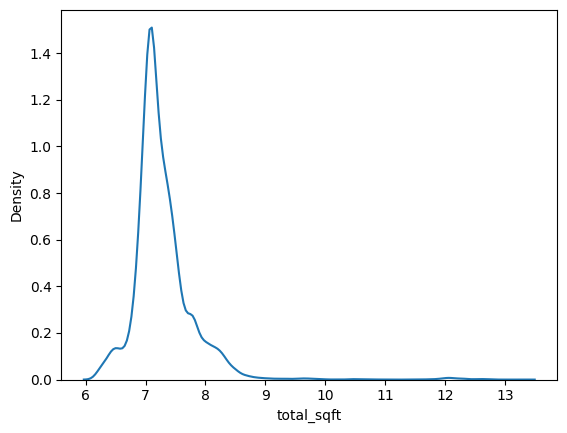

In [1041]:
sns.kdeplot(data['total_sqft'])

In [1042]:
data['total_sqft'].quantile(.97)

8.294049640102028

<Axes: ylabel='total_sqft'>

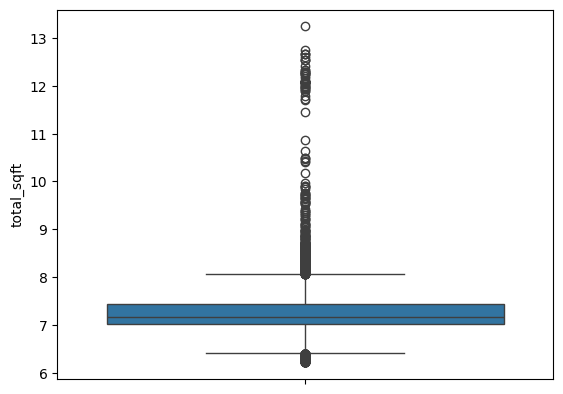

In [1043]:
sns.boxplot(data['total_sqft'])

In [1044]:
indexes=data[(data['total_sqft']>8.31)].index
data.drop(index=indexes,axis=0,inplace=True)

<Axes: xlabel='total_sqft', ylabel='Density'>

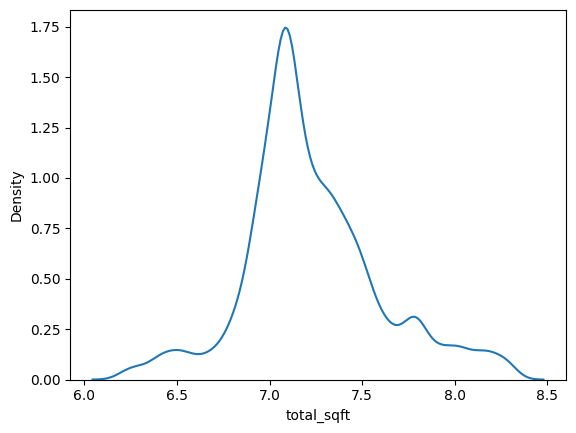

In [1045]:
sns.kdeplot(data['total_sqft'])

<Axes: xlabel='price', ylabel='Density'>

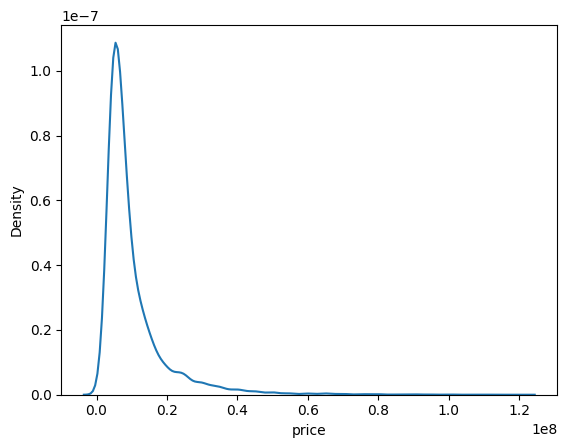

In [1046]:
sns.kdeplot(data['price'])

In [1047]:
data['price']=np.log(data['price'])
data['price'].quantile(.97)

17.37085861945369

In [1048]:
data

area_type  availability  location  society  total_sqft  bath  balcony  \
0              1             1         1   others    6.962243   2.0      1.0   
1              2             2         2  Theanmp    7.863267   5.0      3.0   
2              3             2         2   others    7.272398   2.0      3.0   
3              1             2         2  Soiewre    7.327123   3.0      1.0   
4              1             2         2   others    7.090077   2.0      1.0   
...          ...           ...       ...      ...         ...   ...      ...   
13312          1             2         2   others    7.140453   2.0      2.0   
13314          1             2         2   others    7.447168   3.0      3.0   
13315          3             2         2   others    8.146999   4.0      0.0   
13316          1             2         2   others    8.188689   5.0      2.0   
13317          3             2         2   others    7.039660   2.0      1.0   

           price  rooms  hall/kitchen  
0      15.178280    2.0             1  
1      16.300417    4.0             1  
2      15.640060    3.0             1  
3      16.066802    3.0             1  
4      15.444751    2.0             1  
...          ...    ...           ...  
13312  15.363073    2.0             1  
13314  16.231424    3.0             1  
13315  16.955343    5.0             1  
13316  17.504390    4.0             1  
13317  15.607270    2.0             1  

[11912 rows x 10 columns]

<Axes: xlabel='price', ylabel='Density'>

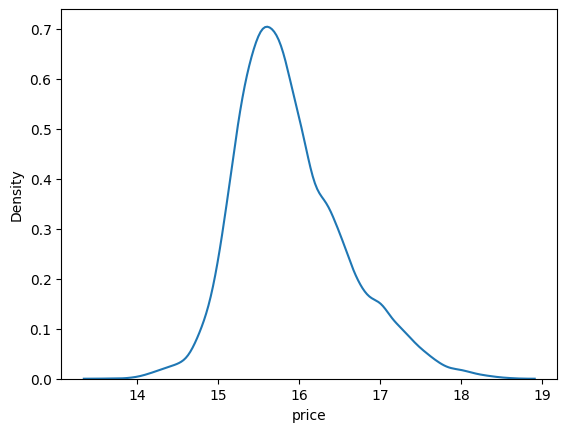

In [1049]:
sns.kdeplot(data['price'])

<Axes: xlabel='rooms', ylabel='Density'>

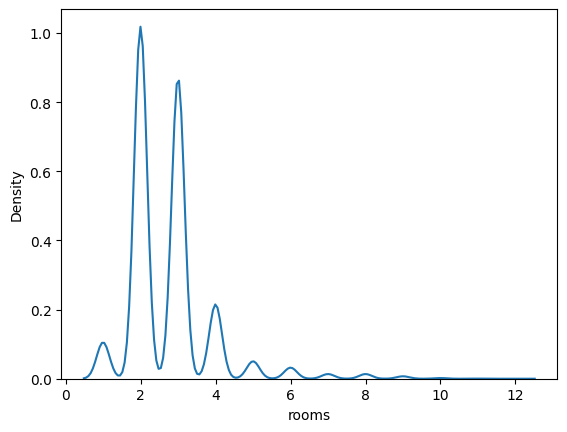

In [1050]:
sns.kdeplot(data['rooms'])

In [1051]:
data

area_type  availability  location  society  total_sqft  bath  balcony  \
0              1             1         1   others    6.962243   2.0      1.0   
1              2             2         2  Theanmp    7.863267   5.0      3.0   
2              3             2         2   others    7.272398   2.0      3.0   
3              1             2         2  Soiewre    7.327123   3.0      1.0   
4              1             2         2   others    7.090077   2.0      1.0   
...          ...           ...       ...      ...         ...   ...      ...   
13312          1             2         2   others    7.140453   2.0      2.0   
13314          1             2         2   others    7.447168   3.0      3.0   
13315          3             2         2   others    8.146999   4.0      0.0   
13316          1             2         2   others    8.188689   5.0      2.0   
13317          3             2         2   others    7.039660   2.0      1.0   

           price  rooms  hall/kitchen  
0      15.178280    2.0             1  
1      16.300417    4.0             1  
2      15.640060    3.0             1  
3      16.066802    3.0             1  
4      15.444751    2.0             1  
...          ...    ...           ...  
13312  15.363073    2.0             1  
13314  16.231424    3.0             1  
13315  16.955343    5.0             1  
13316  17.504390    4.0             1  
13317  15.607270    2.0             1  

[11912 rows x 10 columns]

<Axes: xlabel='rooms', ylabel='price'>

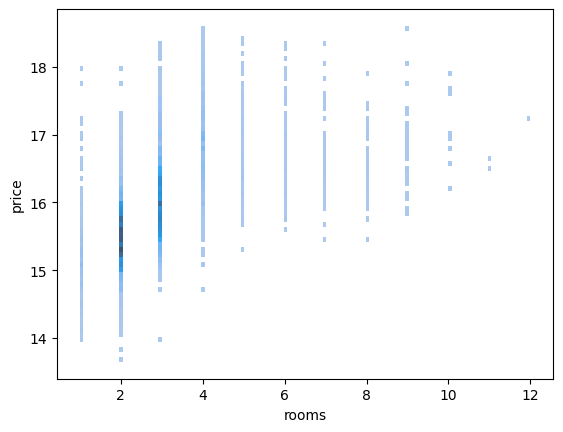

In [1052]:
sns.histplot(data=data,x='rooms',y='price')

<Axes: xlabel='rooms', ylabel='price'>

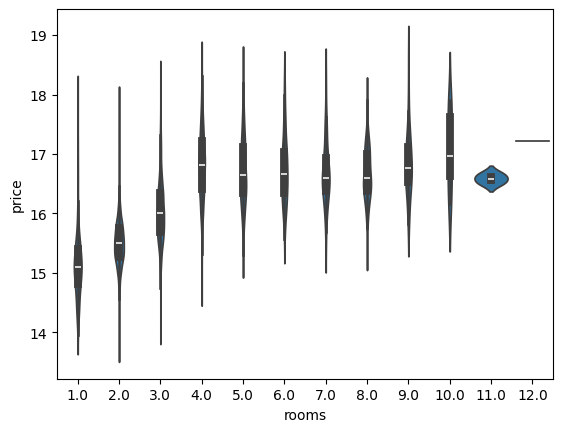

In [1065]:
sns.violinplot(data=data,x='rooms',y='price')

<Axes: xlabel='total_sqft', ylabel='price'>

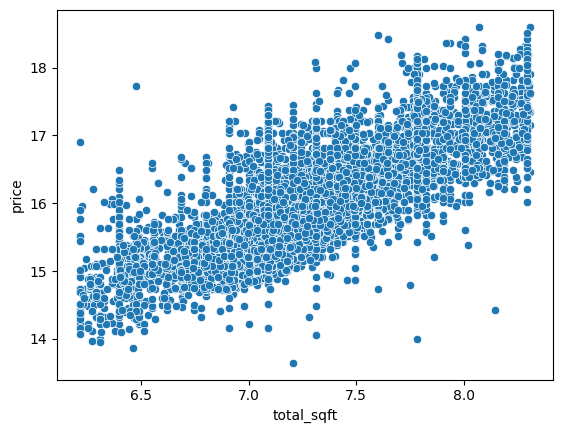

In [1053]:
sns.scatterplot(data=data,x='total_sqft',y='price')

In [1054]:
xf=data.drop(['price'],axis=1)
yf=data['price']

In [1059]:
xf_train,xf_test,yf_train,yf_test=train_test_split(xf,yf,random_state=42,shuffle=True,test_size=.2)

In [1060]:
xf_train.shape,xf_test.shape,yf_train.shape,yf_test.shape

((9529, 9), (2383, 9), (9529,), (2383,))

In [1069]:
ridgef=Ridge()
lrf=LinearRegression()
lassof=Lasso()
sf=StandardScaler()
coltransf = ColumnTransformer([('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), ['society'])], remainder='passthrough')
pipef3=make_pipeline(coltransf,sf,ridgef)
pipef1=make_pipeline(coltransf,sf,lrf)
pipef2=make_pipeline(coltransf,sf,lassof)

In [1070]:
pipef1.fit(xf_train,yf_train)
pipef2.fit(xf_train,yf_train)
pipef3.fit(xf_train,yf_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['society'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [1071]:
yfpred1=pipef1.predict(xf_test)
yfpred2=pipef2.predict(xf_test)
yfpred3=pipef3.predict(xf_test)

In [1075]:
r2_score(yfpred1,yf_test),r2_score(yfpred2,yf_test),r2_score(yfpred3,yf_test)

(0.493791560185054, -1.3811589552524745e+29, 0.49326446277162694)